Let's now apply our knowledge to a more realistic data set. 

Here we will also focus on feature engineering and cleaning our data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# house sale data from kaggle
df = pd.read_csv("./DATA/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# no data was missing

In [6]:
df.describe().transpose()

# some of these doesn't really makes sense
# bcz mean std etc of id nothing

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
# its very hard to read all these
# lets interpret them using data viz

<Figure size 720x432 with 0 Axes>

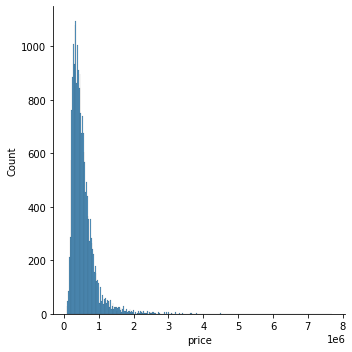

In [8]:
plt.figure(figsize=(10,6))
sns.displot(df['price'])


In [9]:
# 0-1.5 million dollars
# most of the houses price

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

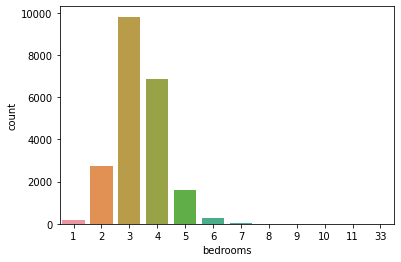

In [10]:
sns.countplot(x='bedrooms',data=df)

In [11]:
# 2-5 bedrooms mostly

In [12]:
 df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [14]:
# price will be highly correlated with itself
# But it looks like price is highly correlated
# with
# bathrooms        0.525906
# sqft_living15    0.585241
# sqft_above       0.605368
# grade            0.667951
# sqft_living      0.701917


In [15]:
# lets explore these correlated features

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

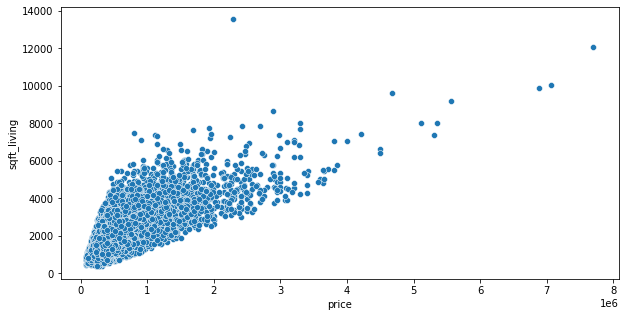

In [16]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

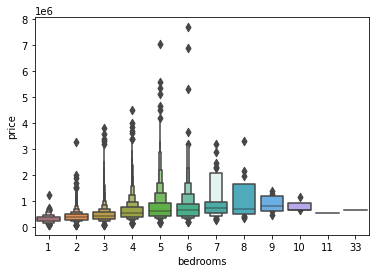

In [17]:
sns.boxenplot(x='bedrooms',y='price',data=df)

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# lat- lattitude
# long - longitude
# lets explore this

In [20]:
# lets see distribution of prices per 
# lattitude or longitude

<AxesSubplot:xlabel='price', ylabel='long'>

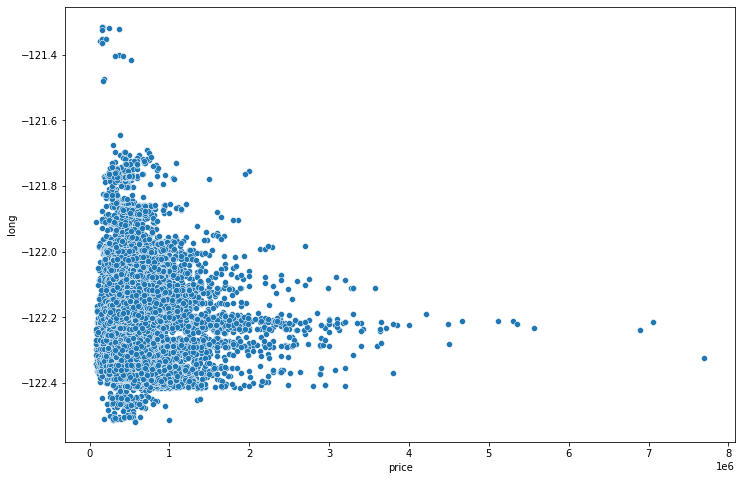

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

In [22]:
# its looks  like longitude around 122.2
# seems to be an expensive household area

<AxesSubplot:xlabel='price', ylabel='lat'>

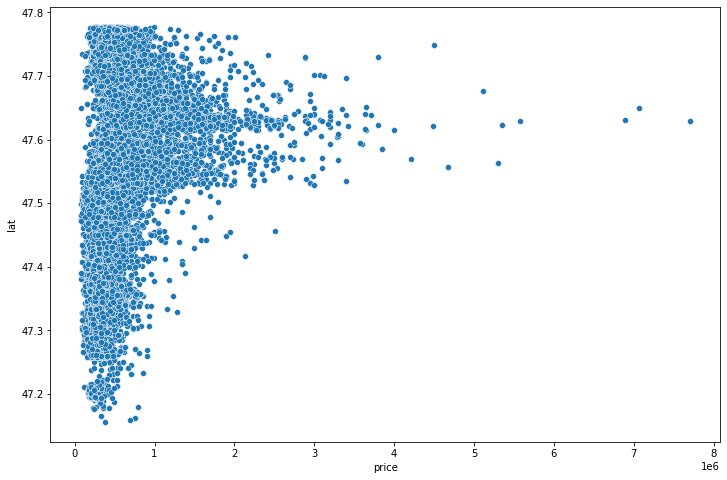

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [24]:
# again this tells for some latitude
# there seems some sort of expensive house
# hold area here lat = 47.6+ is major

<AxesSubplot:xlabel='long', ylabel='lat'>

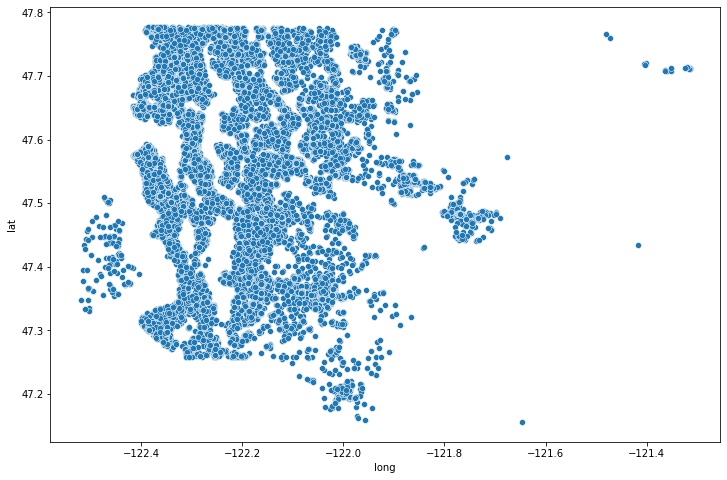

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df)

In [26]:
# see area of king county map looks like this only

<AxesSubplot:xlabel='long', ylabel='lat'>

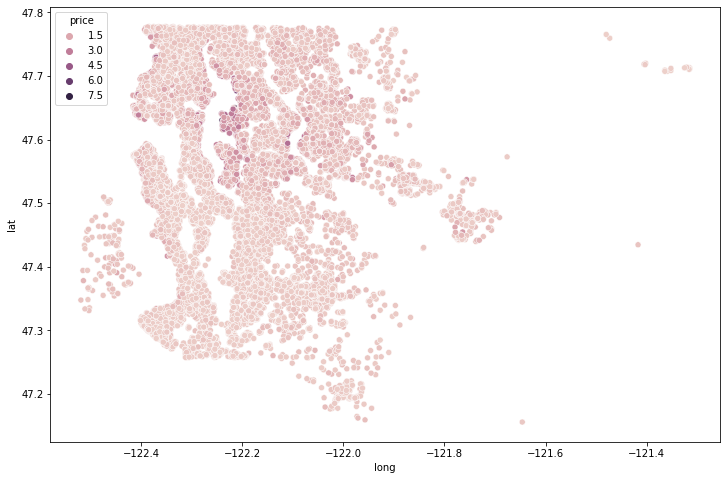

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [28]:
# notice at long=122.2 and lat47.6 mostly
# expensive houses are coming

In [29]:
df.sort_values('price',ascending=False).head(20)

# top 20 most expensive houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [30]:
len(df)

21597

In [31]:
# 21K houses in data

In [32]:
non_top1_percent = df.sort_values('price',ascending=False).iloc[216:]

In [33]:
# i have bottom 99% now

<AxesSubplot:xlabel='long', ylabel='lat'>

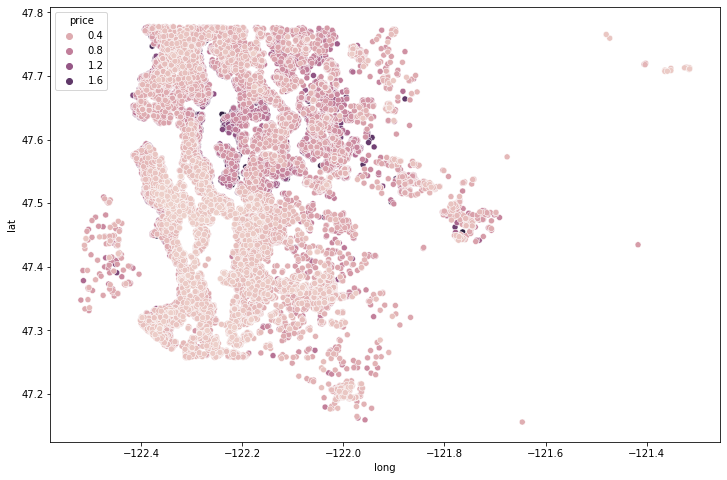

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top1_percent,hue='price')

In [35]:
# now we can see a lot clearer distribution

<AxesSubplot:xlabel='long', ylabel='lat'>

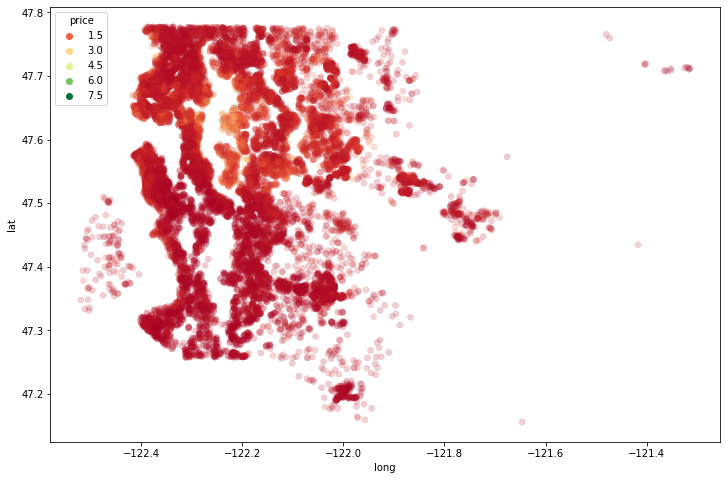

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price',
               edgecolor=None,alpha=0.2,palette='RdYlGn')

In [37]:
# now we can easily visualize most expensive
# houses very easily

<AxesSubplot:xlabel='waterfront', ylabel='price'>

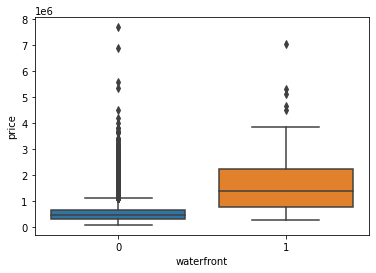

In [38]:
sns.boxplot(x='waterfront',y='price',data=df)

In [39]:
# tells more you are water front more
# you'll have higher price for house

### Part-2

* feature engg process 
* getting rid of features which are not useful

In [40]:
df = df.drop('id',axis=1)

In [41]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [43]:
#  it looks to be some sort of
# string

In [44]:
# lets convert it to a date time object
# by doing the following

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [47]:
# notice that formatting is different
# and datetime64[ns] object unlike earlier

# now we can grab the year,month,day with
# much ease

In [48]:
# lets just take year and month

In [49]:
df['year'] = df['date'].apply(lambda x : x.year)

In [50]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [51]:
df['month'] = df['date'].apply(lambda x : x.month)

In [52]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

In [53]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [54]:
# look year and month columns added

<AxesSubplot:xlabel='month', ylabel='price'>

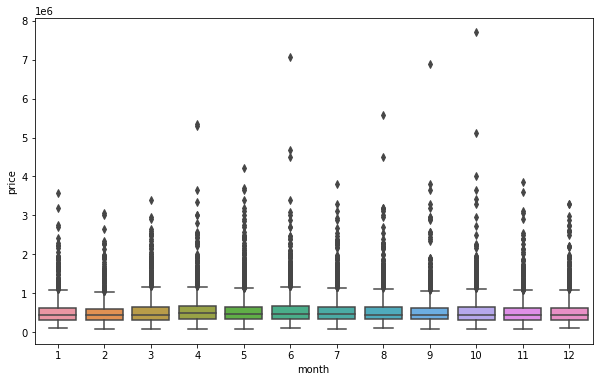

In [55]:
plt.figure(figsize=(10,6))

sns.boxplot(x='month',y='price',data=df)

In [56]:
# a little harder to interpret

In [57]:
df.groupby('month').mean()['price']

# just what's avg price per month

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

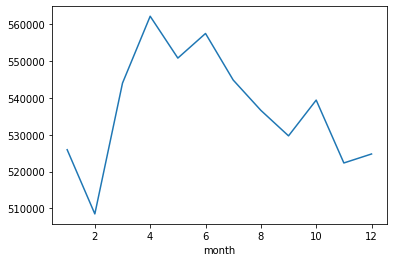

In [58]:
# highest for 4th month
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

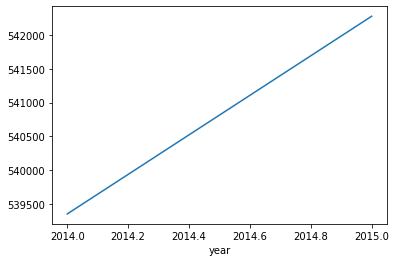

In [59]:
df.groupby('year').mean()['price'].plot()

In [60]:
# so we feature engineered using month
# and year

In [61]:
df = df.drop('date',axis=1)

In [62]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [63]:
# zipcode is numerical
# if we feed it to our model directly
# model will assume it to be some sort of
# continuos feature

# but this may not be case how the zipcode
# are actually mapped on a real map

In [64]:
#  so in this case domain experiance is needed

In [65]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [66]:
# has 70 categories of zipcodes

In [67]:
# 70 is too much for us or using
# domain knowledge we can group them

In [68]:
df = df.drop('zipcode',axis=1)

In [69]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [70]:
df['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int64

In [71]:
# most of the values are essentially
# zeroes so it essentially applies  
# house was not renovated

In [72]:
 df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [74]:
# same thing 

#### time to train the model

In [75]:
X = df.drop('price',axis=1)

In [76]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [77]:
X = df.drop('price',axis=1).values

In [79]:
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 5.650e+03, 2.014e+03,
        1.000e+01],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 7.639e+03, 2.014e+03,
        1.200e+01],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 8.062e+03, 2.015e+03,
        2.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 2.007e+03, 2.014e+03,
        6.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 1.287e+03, 2.015e+03,
        1.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 1.357e+03, 2.014e+03,
        1.000e+01]])

In [80]:
y = df['price'].values

In [81]:
# values applying will give numpy array
# instead of just data frames

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [84]:
# now it's time to do scaling
# remember we do the scaling after split
# to prevent data leakage

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
# define training set as scaled version


In [88]:
X_train = scaler.fit_transform(X_train)

In [89]:
# just transform unlike above both fit and
# transform

X_test = scaler.transform(X_test)

# bcz we don't want to assume prior
# info about our test set

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [91]:
X_train.shape

(15117, 19)

In [92]:
# looks like we have 19 incoming features
#  so that's probably good range to have
# 19 neuruons in our layer

In [94]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# that may lead to overfitting
# since not a good neural network
# but we can check that by passing 
# validation data along with training data

model.add(Dense(1)) #output layer

model.compile(optimizer='adam',loss='mse')
# since its a regression problem so 'mse'
# loss function is preferred

In [96]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128,epochs=400)


# smaller the batch_size longer time it
# takes to train BUT less likely your
# going to overfitt your model

# since it is large data set we are going
# to feed the data in batches

# since tf works with numpy arrays only
# not on pandas series or data frames

# passing validation data means after
# training for each epoch on training data
# we'll run the test data and in that way
# we can keep track of if our model is 
# underfitting or overfitting or none(how 
# well it is done on not only training data
# but also on test data)


# note that this test data will not affect
# weights or biases of our network while keras
# just uses the training data to check
# or update the model's weights and biases

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 427766015317.3333 - val_loss: 418864627712.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 430189738120.5333 - val_loss: 412650176512.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 406076761156.2667 - val_loss: 357834129408.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 338625181013.3333 - val_loss: 201081602048.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 163412598101.3333 - val_loss: 98889236480.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 90245714739.2000 - val_loss: 94434689024.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 94477228032.0000 - val_loss: 92753199104.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 100284940970.6667 - val_loss: 90982031360.0000
Epoch 9/400
119/119 [=

119/119 [==============================] - 0s 2ms/step - loss: 36764481006.9333 - val_loss: 35980455936.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 39318998664.5333 - val_loss: 35767971840.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 35821316232.5333 - val_loss: 35672735744.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 35607658632.5333 - val_loss: 35359117312.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 36768936072.5333 - val_loss: 35348275200.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37253768686.9333 - val_loss: 35033034752.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 35074130670.9333 - val_loss: 34965966848.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 35010260224.0000 - val_loss: 34767671296.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 31010114628.2667 - val_loss: 31045705728.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 30923325610.6667 - val_loss: 30857904128.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 31032954897.0667 - val_loss: 30909091840.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32743300522.6667 - val_loss: 30810095616.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 31888783752.5333 - val_loss: 30769043456.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 30612109687.4667 - val_loss: 30744403968.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 34518281096.5333 - val_loss: 30715056128.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32032332168.5333 - val_loss: 30698848256.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 30464722619.7333 - val_loss: 29141905408.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 30926500966.4000 - val_loss: 29104353280.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 32356883507.2000 - val_loss: 29105092608.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31695927176.5333 - val_loss: 29051682816.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 30473488930.1333 - val_loss: 29081071616.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 32344613614.9333 - val_loss: 29020164096.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 30035662830.9333 - val_loss: 28997466112.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31073827584.0000 - val_loss: 28967370752.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28977963204.2667 - val_loss: 27904720896.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30292218999.4667 - val_loss: 27859595264.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 29620235912.5333 - val_loss: 27831930880.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 29785079893.3333 - val_loss: 27890057216.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 28859785608.5333 - val_loss: 27820308480.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 29456707259.7333 - val_loss: 27812280320.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 29241665518.9333 - val_loss: 27804817408.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 31265502464.0000 - val_loss: 27734091776.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28323601220.2667 - val_loss: 26793185280.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 28707011669.3333 - val_loss: 27155994624.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 28675429068.8000 - val_loss: 26939471872.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 29161449949.8667 - val_loss: 26792652800.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29215535428.2667 - val_loss: 26920306688.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29665085610.6667 - val_loss: 26723067904.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 29150130158.9333 - val_loss: 26745403392.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 29822160861.8667 - val_loss: 26768756736.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29339005320.5333 - val_loss: 25996867584.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 28860170513.0667 - val_loss: 26051459072.0000


In [97]:
model.history

In [98]:
model.history.history

{'loss': [430231158784.0,
  428435505152.0,
  403882541056.0,
  296656273408.0,
  141476855808.0,
  98952495104.0,
  96700686336.0,
  94927396864.0,
  93044752384.0,
  91189354496.0,
  89285599232.0,
  87228325888.0,
  85143805952.0,
  82956976128.0,
  80645701632.0,
  78296817664.0,
  75756920832.0,
  73172049920.0,
  70562054144.0,
  67917701120.0,
  65271500800.0,
  62666162176.0,
  60240891904.0,
  57966313472.0,
  56061870080.0,
  54399668224.0,
  53069590528.0,
  51895230464.0,
  50957037568.0,
  50140577792.0,
  49376133120.0,
  48755142656.0,
  48126791680.0,
  47581179904.0,
  47079669760.0,
  46503583744.0,
  46037073920.0,
  45528219648.0,
  45081165824.0,
  44645859328.0,
  44229840896.0,
  43798290432.0,
  43392098304.0,
  43011604480.0,
  42640568320.0,
  42316312576.0,
  41968828416.0,
  41635946496.0,
  41349181440.0,
  41083920384.0,
  40819068928.0,
  40580362240.0,
  40332652544.0,
  40133906432.0,
  39918567424.0,
  39675088896.0,
  39507185664.0,
  39305707520.0,
 

In [101]:
# since we passed validation data
# what we could do is convert it to a df

losses = pd.DataFrame(model.history.history)

In [102]:
# compare them and see if you are overfittng
# direcly plot them otherwise

<AxesSubplot:>

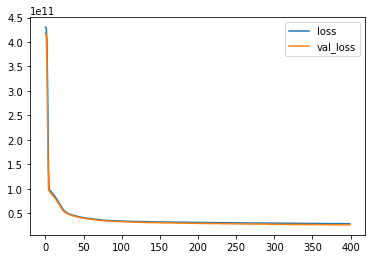

In [103]:
losses.plot()

In [104]:
# we want this kind of similarity
# so no overfitting since both decresing
# no where val_loss increases

In [105]:
# means we could continue training more

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score

In [107]:
pred = model.predict(X_test)

In [108]:
pred

array([[440855.66],
       [585062.44],
       [584596.3 ],
       ...,
       [410644.  ],
       [573385.4 ],
       [680080.56]], dtype=float32)

In [109]:
mean_squared_error(y_test,pred)

26051456870.77583

In [110]:
# price of houses and we are squaring
# so expected larger value but difficult to 
# interpret

In [112]:
np.sqrt(mean_squared_error(y_test,pred))

161404.63707953322

In [111]:
mean_absolute_error(y_test,pred)

101047.92037760417

In [114]:
df['price'].describe()

# mean     5.402966e+05
# so we are actually 

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [116]:
5.402966e+05
# avg price of the house

540296.6

In [117]:
# around 540K dollars
# and our mean_absolute error is about
# 100K dollar

In [118]:
# which is not that great model
# we are off b 20%

In [119]:
explained_variance_score(y_test,pred)

0.8038872931213681

In [120]:
# variance score of around 0.8
# that's just merely okay

# that really depends on contexts do we
# have model that actually performs better
# than this

In [121]:
#   or techincally we could keep training
# and try to get that loss much lower

In [122]:
#  since from our analysis we haven't reached
# overfitting yet 

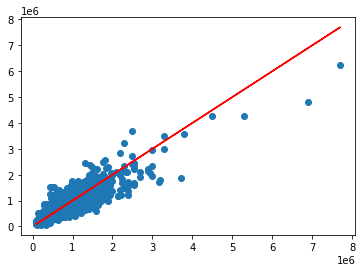

In [124]:
plt.scatter(y_test,pred)

# in a perfect world this would be a straight line
# we can compare by plotting true values separately

plt.plot(y_test,y_test,'r')

#### try your model on a brand new house

In [125]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [127]:
df.drop('price',axis=1).iloc[0]

# this gives only the features of a new house
# in the market

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [128]:
# so let's say a new house came to market
# and you wanna sell it in october 2014
# and you these various features of that
# house

In [129]:

new_house = df.drop('price',axis=1).iloc[0]

In [130]:
# since our model is trained on scaled data
# so we need to test our model on scaled data of new house

In [131]:
new_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [132]:
# notice [] so need to reshape it
# -1 means keep that old dimensions along that axis 

new_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [133]:
scaler.transform(
new_house.values.reshape(-1,19))

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [134]:
# we got scaled version of it

In [135]:
new_house = scaler.transform(
new_house.values.reshape(-1,19))

In [136]:
new_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [137]:
model.predict(new_house)

array([[289138.3]], dtype=float32)

In [138]:
# say house has price = 289K dollars

In [140]:
df['price'].iloc[0]

221900.0

In [141]:
# actual price of new_house is 221900.0
# which is 221K dollars

In [143]:
# looks like overshooting here somewhat 

In [144]:
# what we can do is we drop something top 10-20% data which has higher price
# and then train the model again and then test 

In [ ]:
# and accordingly we could say our model will work for only say 4-5 million dollar
# since that is the range of price over which we have trained our model